In [1]:
import numpy as np
import graph_structure as gs 
import itertools
from tqdm import tqdm
import matplotlib.pyplot as plt

In [8]:
def cka(X1, X2):
    # Center the data
    X1 = X1 - X1.mean(axis=0)
    X2 = X2 - X2.mean(axis=0)

    # Compute the kernel matrices
    K1 = X1.T @ X1
    K2 = X2.T @ X2

    # Compute the squared Frobenius norms
    norm1 = np.linalg.norm(K1, 'fro')
    norm2 = np.linalg.norm(K2, 'fro')

    # Compute the CKA
    cka = np.linalg.norm(X2.T @ X1, 'fro')**2 / (norm1 * norm2)
    return cka

In [2]:
def create_aligned_dataset(
    n_dim: int,
    n_items: list,
    mu1: list,
    sigma1: list,
    mu2: list,
    sigma2: list,
):
    X1 = []
    X2 = []
    for i in range(len(n_items)):
        x_ = np.random.normal(0, 1, (n_items[i], n_dim))
        x1_ = x_ * sigma1[i] + mu1[i]
        x2_ = x_ * sigma2[i] + mu2[i]
        X1.append(x1_)
        X2.append(x2_)
    X1 = np.vstack(X1)
    X2 = np.vstack(X2)
    return X1, X2


X1, X2 = create_aligned_dataset(
    50,
    [100, 100],
    [-3, 3],
    [0.5, 1],
    [-3, 3],
    [1, 0.5],
)

In [10]:
def create_aligned_dataset_along_circle(n_points, min_theta, max_theta, space_factor):
    t1 = np.linspace(0, 1, n_points)
    t2 = t1 ** space_factor
    t1 = t1 * (max_theta-min_theta) + min_theta
    t2 = t2 * (max_theta-min_theta) + min_theta
    X1 = np.vstack([np.cos(t1), np.sin(t1)]).T
    X2 = np.vstack([np.cos(t2), np.sin(t2)]).T
    return X1, X2

X1, X2 = create_aligned_dataset_along_circle(50, 0, np.pi, 1.0)

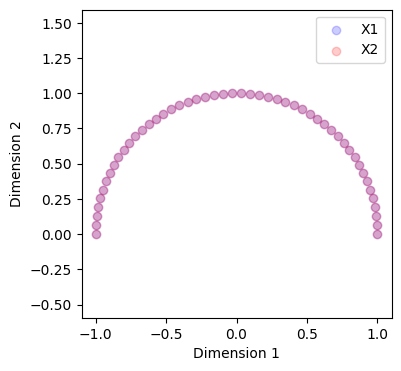

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4,4))
plt.scatter(X1[:, 0], X1[:, 1], alpha=0.2, c='b', label='X1')
plt.scatter(X2[:, 0], X2[:, 1], alpha=0.2, c='r', label='X2')
for i in range(X1.shape[0]):
    plt.plot([X1[i, 0], X2[i, 0]], [X1[i, 1], X2[i, 1]], color='black', alpha=0.2)

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.axis('equal')
plt.show()

In [22]:
X1, X2 = create_aligned_dataset(
    2,
    [10, 1000],
    [-3, 3],
    [0.1, 1],
    [-3, 3],
    [1, .1],
)
cka_similarity = cka(X1, X2)
gs_similarity = gs.mean_neighborhood_similarity_from_points(X1, X2, k=int(X2.shape[0]*0.2), metric='minkowski', n_jobs=-1)
print(cka_similarity, gs_similarity)

0.4672655157457886 0.9989769645762784



- Resilience to unbalance in datasets
- Flexibility of using different metrics
- Approximate nearest neighbors could improve efficiency

What we already have: 
- Useful in the same cases as CKA

Problem:
- Less resilient to noise in dense neighborhoods

Tasks:
- Make metric a parameter for neighborhood calculation
- Implement CKA as part of the similarity library


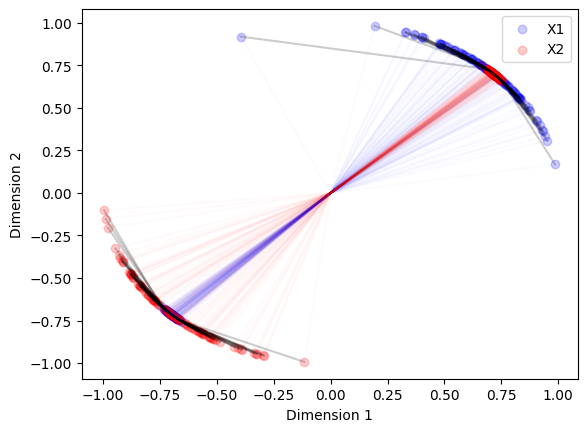

In [7]:
import matplotlib.pyplot as plt

plt.figure()
X1_centered = X1-np.mean(X1, axis=0)
X2_centered = X2-np.mean(X2, axis=0)
X1_centered = X1_centered/np.linalg.norm(X1_centered, axis=1, keepdims=True)
X2_centered = X2_centered/np.linalg.norm(X2_centered, axis=1, keepdims=True)
plt.scatter(X1_centered[:, 0], X1_centered[:, 1], alpha=0.2, c='b', label='X1')
plt.scatter(X2_centered[:, 0], X2_centered[:, 1], alpha=0.2, c='r', label='X2')
for i in range(X1.shape[0]):
    plt.plot([X1_centered[i, 0], X2_centered[i, 0]], [X1_centered[i, 1], X2_centered[i, 1]], color='black', alpha=0.2)

X1_centroid = np.mean(X1, axis=0)
for i in range(X1.shape[0]):
    plt.plot([X1_centered[i, 0], 0], [X1_centered[i, 1], 0], color='b', alpha=0.02)

X2_centroid = np.mean(X2, axis=0)
for i in range(X2.shape[0]):
    plt.plot([X2_centered[i, 0], 0], [X2_centered[i, 1], 0], color='r', alpha=0.02)

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

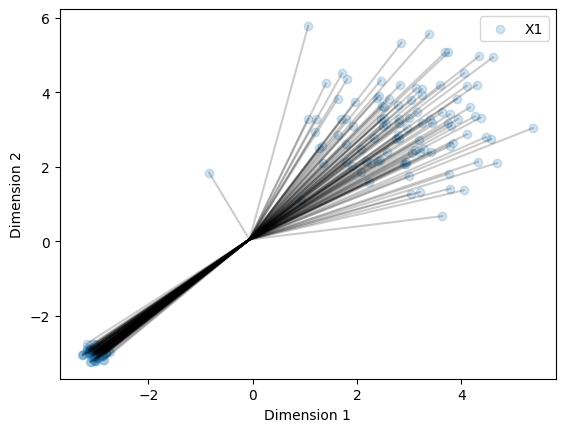

In [8]:
plt.figure()
plt.scatter(X1[:, 0], X1[:, 1], alpha=0.2, label='X1')
X1_centroid = np.mean(X1, axis=0)
for i in range(X1.shape[0]):
    plt.plot([X1[i, 0], X1_centroid[0]], [X1[i, 1], X1_centroid[1]], color='black', alpha=0.2)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

In [7]:
cka_similarity = cka(X1, X2)
gs_similarity = gs.mean_neighborhood_similarity_from_points(X1, X2, k=3)
print(cka_similarity, gs_similarity)

0.47010087447380805 1.0


In [11]:
nx1 = gs.nearest_neighbors(X1)
nx2 = gs.nearest_neighbors(X2)
for i in range(X1.shape[0]):
    print(f'Ref {i}: X1:{set(nx1[i, 0:3])} \t X2:{set(nx2[i, 0:3])}')

Ref 0: X1:{44, 37, 87} 	 X2:{44, 37, 87}
Ref 1: X1:{96, 66, 86} 	 X2:{96, 66, 86}
Ref 2: X1:{3, 75, 93} 	 X2:{3, 75, 93}
Ref 3: X1:{75, 18, 2} 	 X2:{75, 18, 2}
Ref 4: X1:{25, 36, 6} 	 X2:{25, 36, 6}
Ref 5: X1:{32, 22, 15} 	 X2:{32, 22, 15}
Ref 6: X1:{24, 25, 4} 	 X2:{24, 25, 4}
Ref 7: X1:{42, 70, 55} 	 X2:{42, 70, 55}
Ref 8: X1:{97, 59, 47} 	 X2:{97, 59, 47}
Ref 9: X1:{40, 16, 96} 	 X2:{40, 16, 96}
Ref 10: X1:{50, 83, 84} 	 X2:{50, 83, 84}
Ref 11: X1:{26, 35, 53} 	 X2:{26, 35, 53}
Ref 12: X1:{66, 68, 45} 	 X2:{66, 68, 45}
Ref 13: X1:{49, 17, 95} 	 X2:{49, 17, 95}
Ref 14: X1:{81, 86, 71} 	 X2:{81, 86, 71}
Ref 15: X1:{32, 5, 22} 	 X2:{32, 5, 22}
Ref 16: X1:{42, 77, 70} 	 X2:{42, 77, 70}
Ref 17: X1:{60, 79, 23} 	 X2:{60, 79, 23}
Ref 18: X1:{72, 29, 63} 	 X2:{72, 29, 63}
Ref 19: X1:{41, 68, 12} 	 X2:{41, 68, 12}
Ref 20: X1:{58, 5, 22} 	 X2:{58, 5, 22}
Ref 21: X1:{10, 83, 94} 	 X2:{10, 83, 94}
Ref 22: X1:{85, 5, 15} 	 X2:{85, 5, 15}
Ref 23: X1:{17, 60, 79} 	 X2:{17, 60, 79}
Ref 24: X1:{88, 

In [12]:
factors = np.linspace(1, 10, 100)
list_cka = []
list_gs = []
for factor in factors:
    X1, X2 = create_aligned_dataset_along_circle(10, 0, np.pi, factor)
    cka_similarity = cka(X1, X2)
    gs_similarity = gs.mean_neighborhood_similarity_from_points(X1, X2, k=5)
    list_cka.append(cka_similarity)
    list_gs.append(gs_similarity)

plt.figure()
plt.plot(factors, list_cka, label='CKA')
plt.plot(factors, list_gs, label='GS')
plt.xlabel('Factor')
plt.ylabel('Similarity')
plt.legend()
plt.show()

plt.figure()
xaux = np.linspace(0, 1, 100)
for factor in factors:
    plt.plot(xaux**factor, xaux)
plt.show()


NameError: name 'create_aligned_dataset_along_circle' is not defined

In [13]:
def create_focus_blob(n_points_blob, theta_center, theta_range):
    min_theta = theta_center - theta_range
    max_theta = theta_center + theta_range
    t = np.linspace(min_theta, max_theta, n_points_blob)
    X = np.vstack([np.cos(t), np.sin(t)]).T
    return X


def create_theta_centers(n_centers, min_theta, max_theta, space_factor):
    t = np.linspace(0, 1, n_centers)**space_factor
    t = t * (max_theta - min_theta) + min_theta
    return t


n_centers = 10
n_points_blob = 10
factor = 3
theta_range = 0.1 * np.pi / n_centers

c1 = create_theta_centers(n_centers, 0, np.pi, 1)
c2 = create_theta_centers(n_centers, 0, np.pi, factor)

X1 = []
X2 = []
for i in range(n_centers):
    X1.append(create_focus_blob(n_points_blob, c1[i], theta_range))
    X2.append(create_focus_blob(n_points_blob, c2[i], theta_range))
X1 = np.vstack(X1)
X2 = np.vstack(X2)

cka_similarity = cka(X1, X2)
gs_similarity = gs.mean_neighborhood_similarity_from_points(X1, X2, k=5)
print(cka_similarity, gs_similarity)

0.8307311045750385 0.7070238095238094


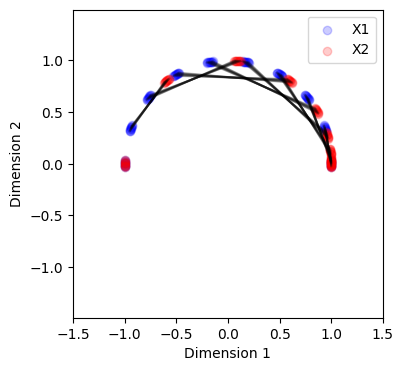

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4,4))
plt.scatter(X1[:, 0], X1[:, 1], alpha=0.2, c='b', label='X1')
plt.scatter(X2[:, 0], X2[:, 1], alpha=0.2, c='r', label='X2')
for i in range(X1.shape[0]):
    plt.plot([X1[i, 0], X2[i, 0]], [X1[i, 1], X2[i, 1]], color='black', alpha=0.2)

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.axis('equal')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.show()

In [15]:
def create_focus_blob(n_points, min_theta1, max_theta1, min_theta2, max_theta2):
    t1 = np.linspace(min_theta1, max_theta1, n_points)
    t2 = np.linspace(min_theta2, max_theta2, n_points)
    X1 = np.vstack([np.cos(t1), np.sin(t1)]).T
    X2 = np.vstack([np.cos(t2), np.sin(t2)]).T
    return X1, X2

X1a, X2a = create_focus_blob(100, np.pi/2, np.pi, 0, np.pi/8)
X1b, X2b = create_focus_blob(10, 1.5*np.pi, 1.6*np.pi, np.pi, 2*np.pi)
X1 = np.vstack([X1a, X1b])
X2 = np.vstack([X2a, X2b])


X1 *= np.array([1, 10])
X2 *= np.array([1, 10])

# noise = np.random.normal(0, 0.01, X1.shape)
# X1 += noise
# X2 += noise

cka_similarity = cka(X1, X2)
gs_similarity = gs.mean_neighborhood_similarity_from_points(X1, X2, k=5)
print(cka_similarity, gs_similarity)

0.24424804124965252 0.6493506493506486


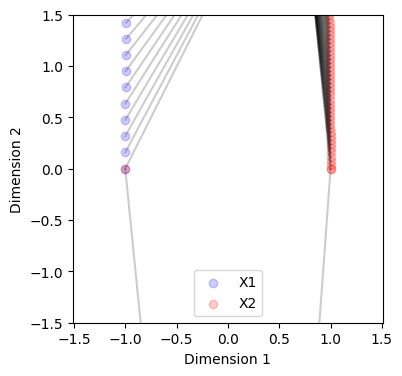

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4,4))
plt.scatter(X1[:, 0], X1[:, 1], alpha=0.2, c='b', label='X1')
plt.scatter(X2[:, 0], X2[:, 1], alpha=0.2, c='r', label='X2')
for i in range(X1.shape[0]):
    plt.plot([X1[i, 0], X2[i, 0]], [X1[i, 1], X2[i, 1]], color='black', alpha=0.2)

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.axis('equal')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.show()